# **Speech Processing Lab 6**

Rishabh Tripathi (180030036)

## **Aim**
1. To understand the need for short term processing of speech.
2. To compute short term energy and study its significance.
3. To compute short term zero crossing rate and study its significance.
4. To compute short term autocorrelation and study its significance.


In [64]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 6

/content/drive/MyDrive/Speech Processing Lab/Lab 4


## **Theory**
Speech is produced from a time varying vocal tract system with time varying excitation. As a result the speech signal is non-stationary in nature. Most of the signal processing tools studied in signals and systems and signal processing assume time invariant system  and time invariant excitation, i.e. stationary signal. Hence these tools are not directly applicable for speech processing. This is because, use of such tools directly on speech violates their underlying assumption.

An engineering solution proposed for processing speech was to make use of existing signal processing tools in a modified fashion. To be more specific, the tools can still assume the signal under processing to be stationary. Speech signal may be stationary when it is viewed in blocks  of 10-30 msec. Hence to process speech by different signal processing tools, it is viewed in terms of 10-30 msec. Such a processing is termed as Short Term Processing (STP).

### **Short Term Energy**
The energy associated with speech is time varying in nature. Hence the interest for any automatic processing of speech is to know how the energy is varying with time and to be more specific, energy associated with short term region of speech.

$E=\sum_{i=0}^{N-1} {s_i}^2$

This relation will give total energy present in the frame of speech from $n=0$ to $n=N-1$. To represent more specifically, only one frame of speech we use the relation

$s_w(n) = s(m)w(n-m)$

where $w(n)$ represent the windowing function of finite duration. There are several windowing functions present in the signal processing literature. The mostly used ones include rectangular, hanning and hamming.

### **Short Term Zero Crossing Rate**
Zero Crossing Rate gives information about the number of zero-crossings present in a given signal. Intuitively, if the number of zero crossings are more in a given signal, then the signal is changing rapidly and accordingly the signal may contain  high frequency information. On the similar lines, if the number of zero crossing are less, hence the signal is changing slowly and accordingly the signal may contain low frequency information. Thus ZCR gives an indirect information about the frequency content of the signal.

$z(n) = \frac{1}{2N} \sum_{m=0}^{N-1}s(m)w(n-m)$

### **Short Term Autocorrelation**
Autocorrelation refers to the case of having only one sequence for correlation. In autocorrelation, the interest is in observing how similar the signal characteristics with respect to time. This is achived by providing different time lag for the sequence and computing with the given sequence as reference.

The autocorrelation is a very useful tool in case of speech processing. However due to the non-stationary nature of speech, a short term version of the autocorrelation is needed.

$r_{ss}(n, k) = \sum_{m=-\infty}^{\infty}s(m)w(n-m)s(m+k)w(n-k+m)$



## **Problem A**
Short term energy(STE) : 
1. Compute and plot STE (as a function of frame index) using frame size as 20ms and  frameshift as 10ms.
2. Demonstrate and explain the effect of the window size on STE by taking window size of 20ms, 30ms, 50ms, 100ms. Also comment on which frame size is preferred.


### **Procedure**
1. Record the words "speech signal" using WaveSurfer and save the .wav file in google drive.
2. Use the below defined functions to plot the waveform and the short term energy of the audio signal for different frame sizes and the frame shifts. 

In [6]:
def wave_plot(sound, time, sound_name):
    plt.figure(figsize=(15,5))
    plt.plot(time, sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [11]:
# Function to compute Short Term Energy
def ST_energy(sound, sound_name, frame_size, frame_shift):
    len = sound.shape[0]
    ste_array = np.zeros((int(np.floor((len-frame_size*fs)/(frame_shift*fs)))+1,))

    for i in range(ste_array.shape[0]):

        frame = sound[int(i*(frame_shift*fs)): int(i*(frame_shift*fs)+(frame_size*fs))]
        ste_array[i] = np.sum(frame**2)

    plt.figure(figsize=(15,5))
    plt.plot(ste_array)
    plt.title("Short Term Energy of sound "+ "/" + sound_name + "/")
    plt.xlabel('Frame index')
    plt.ylabel('Energy')
    plt.show()

In [8]:
# Loading the audio file
audio, fs = librosa.load("speech_signal.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

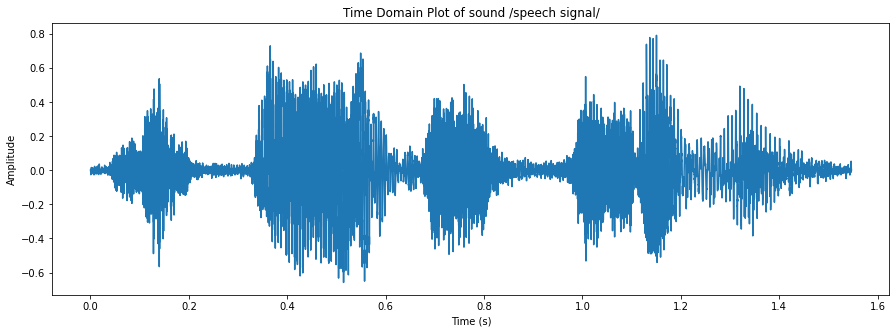

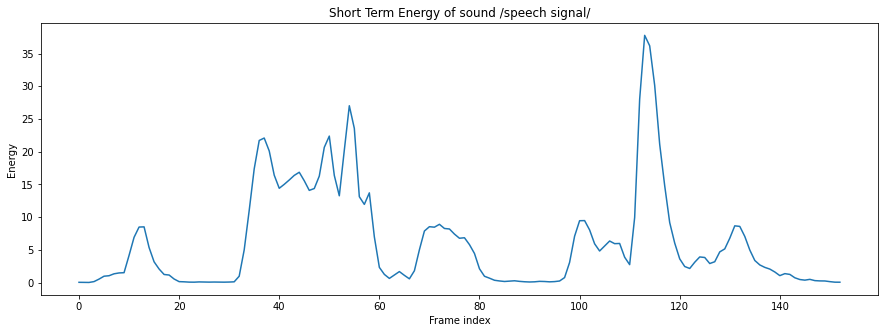

In [12]:
wave_plot(audio, t, "speech signal")

# Plotting the Short time energy using:
# frame_size = 20 ms
# frame_shift = 10 ms
ST_energy(audio, "speech signal", 0.020, 0.010)

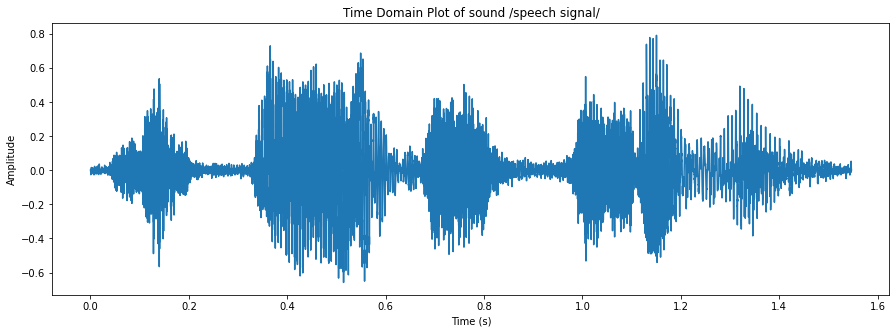

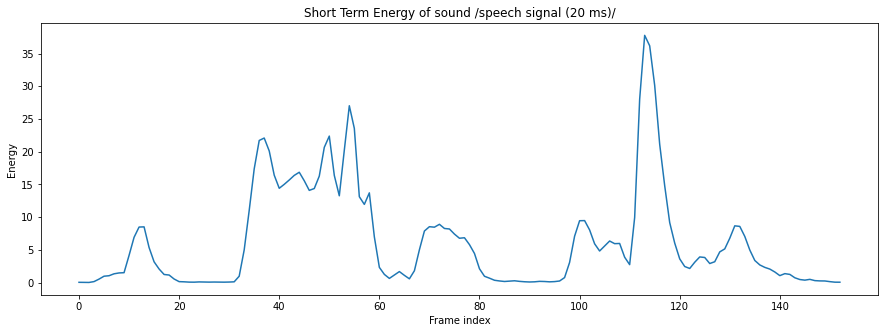

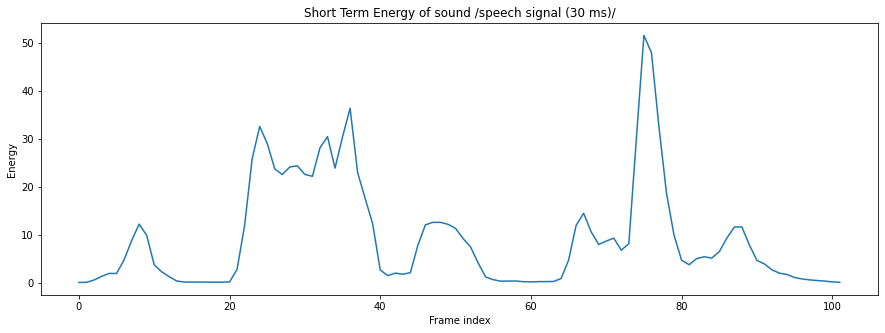

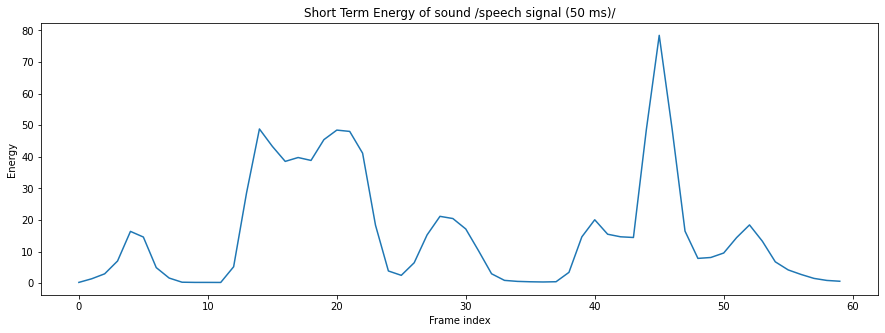

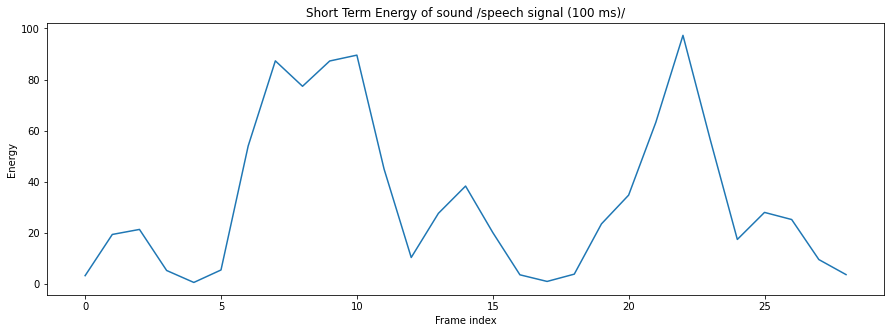

In [14]:
wave_plot(audio, t, "speech signal")

# Plotting the Short time energy using (respectively):
# frame_size = 20, 30, 50, 100 ms
# frame_shift = 10, 15, 25, 50 ms
ST_energy(audio, "speech signal (20 ms)", 0.020, 0.010)
ST_energy(audio, "speech signal (30 ms)", 0.030, 0.015)
ST_energy(audio, "speech signal (50 ms)", 0.050, 0.025)
ST_energy(audio, "speech signal (100 ms)", 0.100, 0.050)

### **Observations**
1. As the window size increases, we average out longer duration of audio to get the short term energy.
2. The frame size of 20 ms should be preferred as it is not too long so as to violate the quasi-stationarity assumption.

## **Problem B**
Short term Zero Crossing Rate(ST-ZCR) : 
1. Compute and plot ST-ZCR for speech signal using frame size as 20ms and  frameshift as 10ms.
2. Demonstrate and explain the effect of the window on ST-ZCR by taking window size of 20ms, 30ms, 50ms, 100ms. Also comment on which frame size is preferred.


### **Procedure**
1. Using the below define function to plot the short term ZCR.
2. Plot the ZCR for each frame size and frame shift value.

In [17]:
# Function to compute Short Term Zero-Crossing Rate
def ST_ZCR(sound, sound_name, frame_size, frame_shift):
    len = sound.shape[0]
    zcr_array = np.zeros((int(np.floor((len-frame_size*fs)/(frame_shift*fs)))+1,))

    for i in range(zcr_array.shape[0]):

        frame = sound[int(i*(frame_shift*fs)): int(i*(frame_shift*fs)+(frame_size*fs))]
        zero_crosses = np.nonzero(np.diff(frame > 0))[0]
        zcr_array[i] = (zero_crosses.size)/(frame_size*fs)

    plt.figure(figsize=(15,5))
    plt.plot(zcr_array)
    plt.title("Short Term Zero-Crossing Rate of sound "+ "/" + sound_name + "/")
    plt.xlabel('Frame index')
    plt.ylabel('ZCR')
    plt.show()

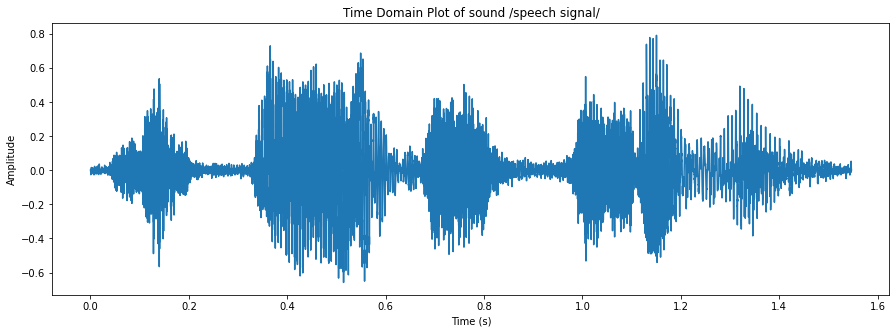

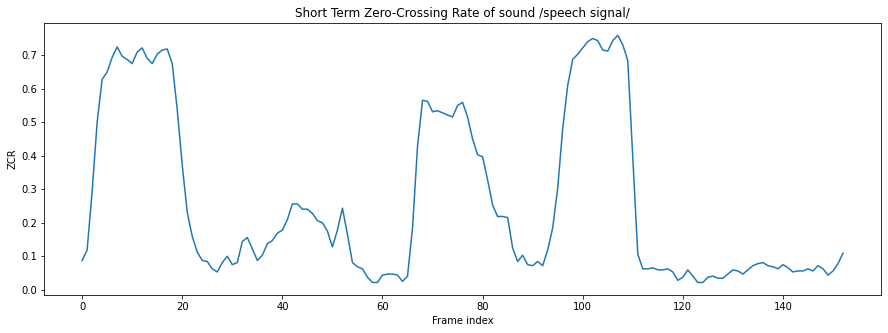

In [18]:
wave_plot(audio, t, "speech signal")

# Plotting the Short time ZCR using:
# frame_size = 20 ms
# frame_shift = 10 ms
ST_ZCR(audio, "speech signal", 0.020, 0.010)

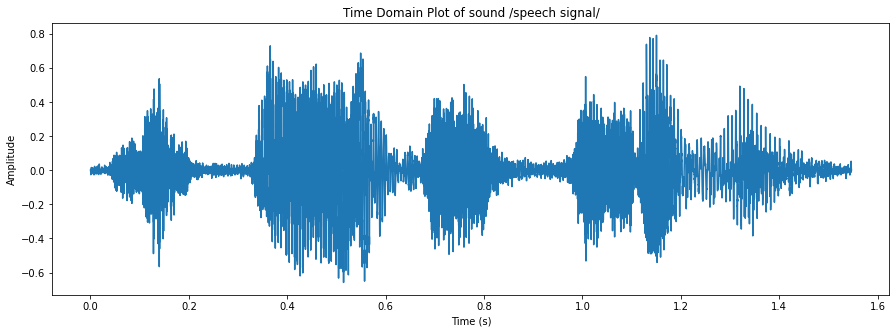

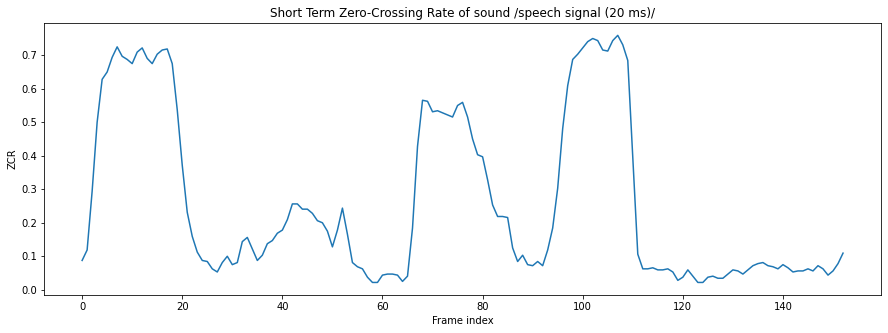

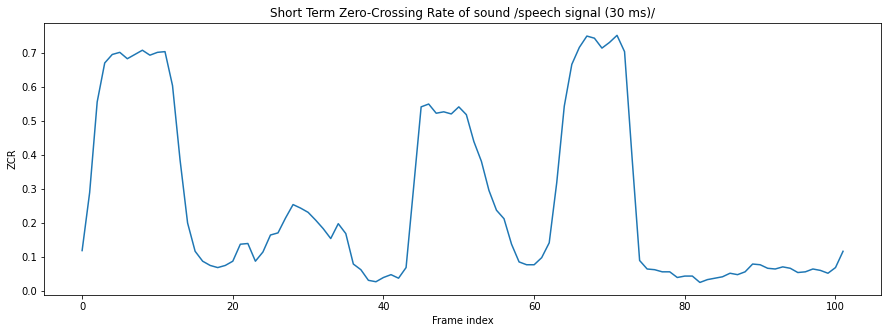

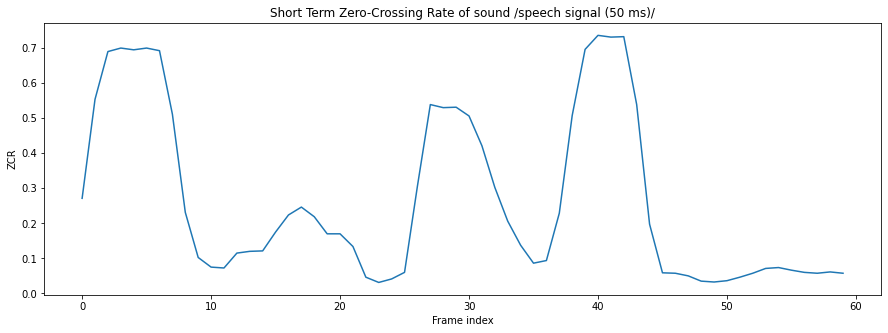

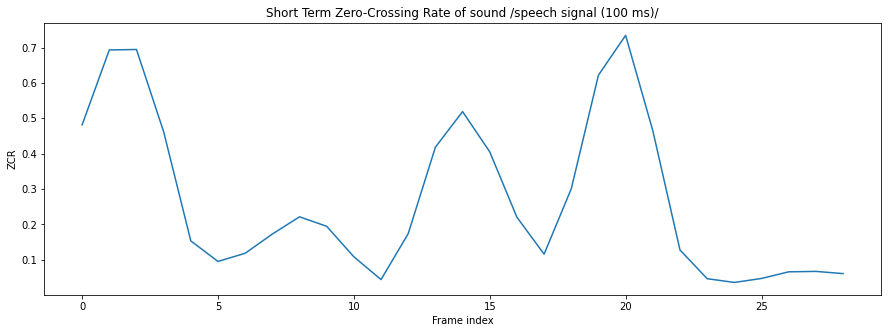

In [19]:
wave_plot(audio, t, "speech signal")

# Plotting the Short time energy using (respectively):
# frame_size = 20, 30, 50, 100 ms
# frame_shift = 10, 15, 25, 50 ms
ST_ZCR(audio, "speech signal (20 ms)", 0.020, 0.010)
ST_ZCR(audio, "speech signal (30 ms)", 0.030, 0.015)
ST_ZCR(audio, "speech signal (50 ms)", 0.050, 0.025)
ST_ZCR(audio, "speech signal (100 ms)", 0.100, 0.050)

### **Observations**
1. When we take smaller frame size, the regions with high and low ZCR are more defined.
2. Frame size of 20 ms should be preferred to maintain the assumption of qualsi-stationarity.

## **Problem C**
Do each of the following for one speech frame at the centre of the vowel, and another speech frame at the centre of  the consonant “s”.

1. Compute and plot short term Autocorrelation function (as a function of delay index) for a 20ms long speech frame.
2. Demonstrate and explain the effect of the window on Short term Autocorrelation by taking window size of 10ms, 20ms, 50ms, 100ms. Also comment on which frame size is preferred.
3. Demonstrate and explain the effect of the window shape on Short term Autocorrelation by taking the ‘rectangular’, ‘Hamming’ and ‘Hanning’ window. Take frame size as the most preferred frame size computed in (b). Also comment on which window is preferred.


### **Procedure**
1. Use WaveSurfer to identify the time stamp of a vowel "ee" and a consonant "ss".
2. Use the below defined functions to plot the autocorrelation for a specific frame and also to print the heatmap of autocorrelation for the entire audio signal.
3. Plot the autocorrelation for both the sounds for different frame sizes. 
4. Use numpy library to get the Hamming and Hanning window of appropriate size and multiply with the frame of chosen frame size. Plot the autocorrelation of these windowed frames. 

In [95]:
def wave_plot_samples(sound, sound_name):
    plt.figure(figsize=(15,5))
    plt.plot(sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

In [97]:
def autocorr(sound, plot=0, sound_name=""):
    len = sound.shape[0]
    shift = np.arange(0, len, 1)
    autocorr = np.zeros((shift.shape[0],))

    for curr_shift in shift:
        autocorr[curr_shift] = np.dot(sound[0:len-curr_shift].T,sound[curr_shift:])

    if plot:
        plt.figure(figsize=(15,5))
        plt.plot(shift, autocorr)
        plt.title("Autocorrelation of sound "+ "/" + sound_name + "/")
        plt.xlabel('Shift')
        plt.ylabel('Autocorrelation')
        plt.show()

    else:
        return autocorr

def ST_autocorr(sound, sound_name, frame_size):
    number = int(np.floor(sound.shape[0]/(frame_size*fs)))
    st_autocorr = np.zeros((1, int(frame_size*fs)))
    for i in range(number):
        frame = sound[int(i*frame_size*fs) : int((i+1)*frame_size*fs)]
        frame_autocorr = np.expand_dims(autocorr(frame), 0)
        st_autocorr = np.concatenate((st_autocorr, frame_autocorr), 0)

    st_autocorr = st_autocorr[1:]

    fig = plt.figure(figsize=(15, 10))
    ax = sns.heatmap(st_autocorr)
    ax.set_title("Heatmap for Short Term Autocorrelation of sound: "+ "/" + sound_name + "/")
    ax.set_xlabel("Shift (samples)")
    ax.set_ylabel("Frame Index")
    #return st_autocorr

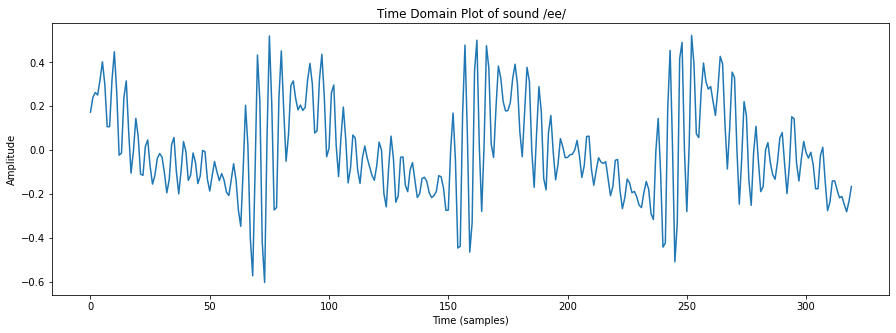

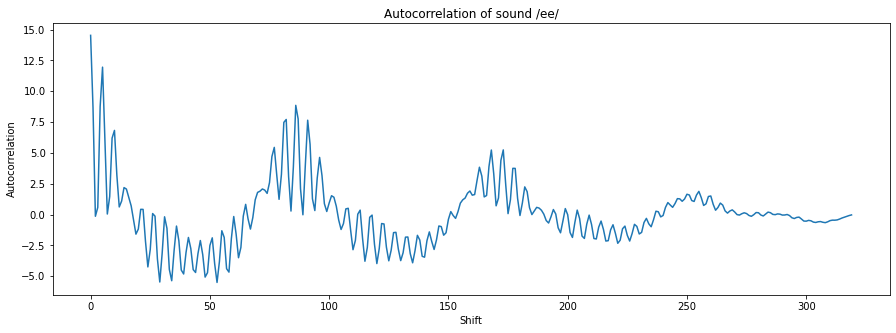

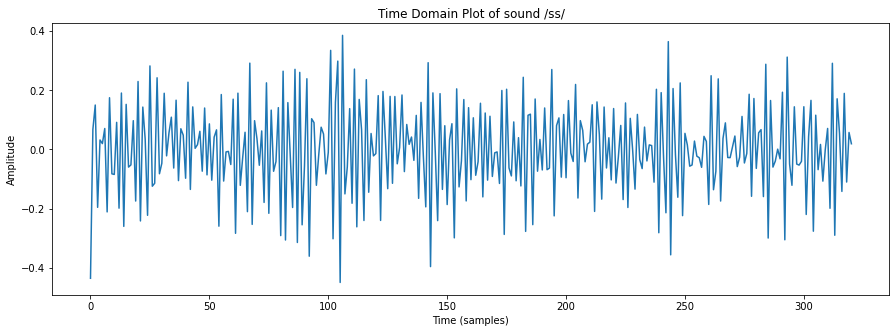

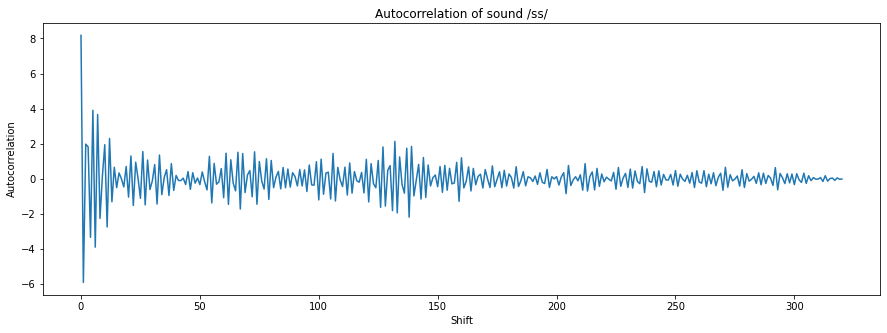

In [98]:
# We choose 2 regions for extracting frames of different size:
# /ee/ sound => 0.437 s
# /ss/ sound => 1.033 s

# plotting autocorrelation for 2 frames:
# frame_size = 20 ms
ee = audio[int((0.437-0.010)*fs):int((0.437+0.010)*fs)]
ss = audio[int((1.033-0.010)*fs):int((1.033+0.010)*fs)]

wave_plot_samples(ee, "ee")
autocorr(ee, plot=1, sound_name="ee")
wave_plot_samples(ss, "ss")
autocorr(ss, plot=1, sound_name="ss")

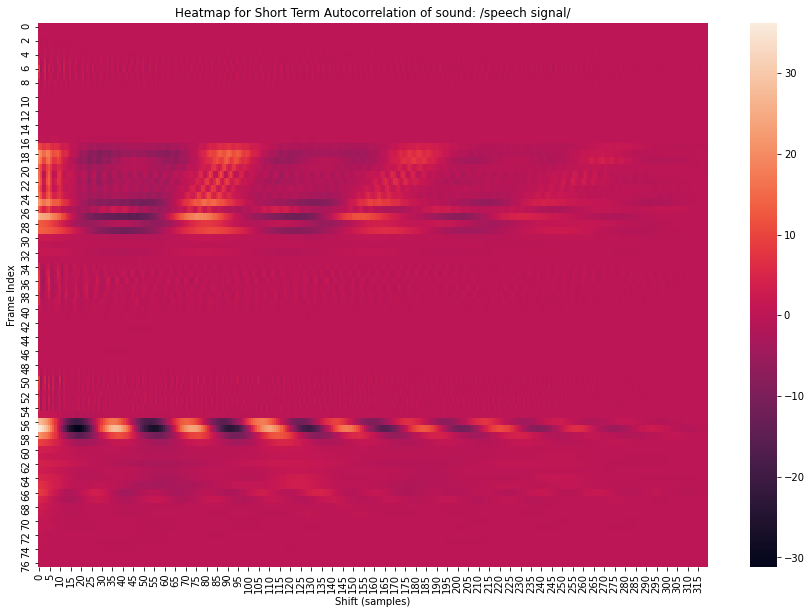

In [99]:
# Plotting the heatmap for the short term autocorrelation for entire audio
ST_autocorr(audio, "speech signal", 0.020) # frame_size = 20 ms

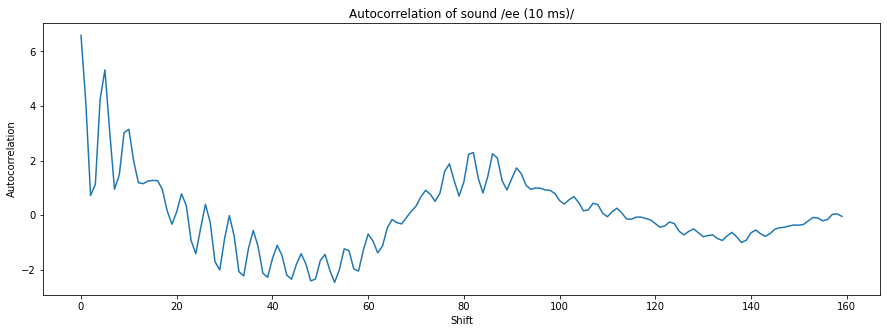

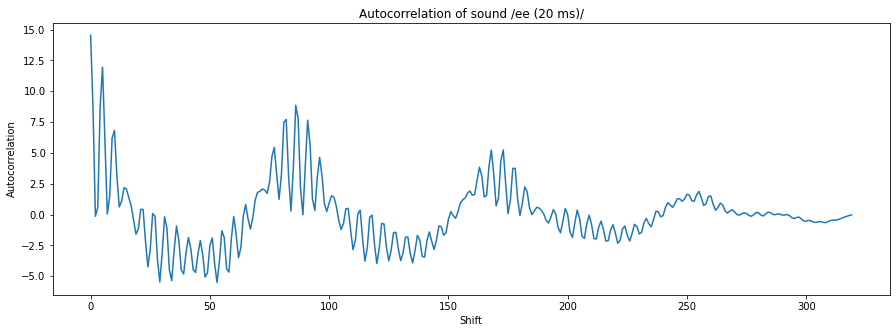

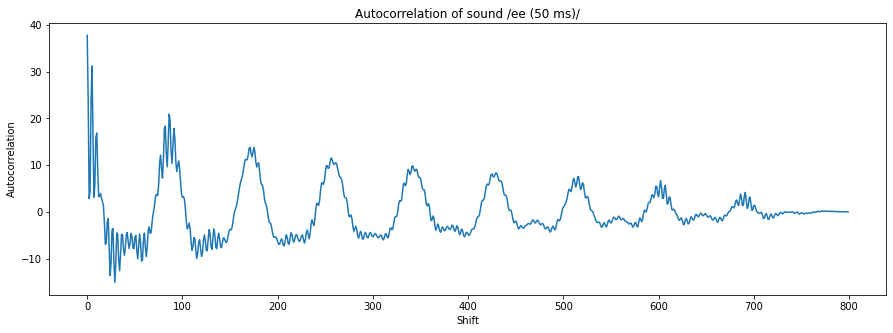

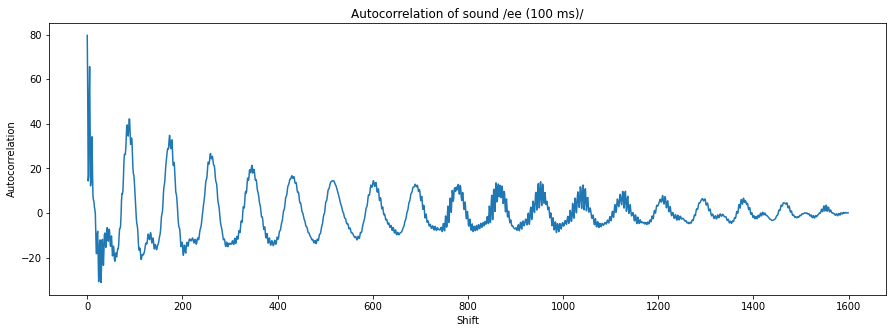

In [100]:
# take the frame size as follows:
# frame_size = 10, 20, 50, 100 ms

# For sound /ee/
ee = audio[int((0.437-0.005)*fs):int((0.437+0.005)*fs)]
autocorr(ee, plot=1, sound_name="ee (10 ms)")

ee = audio[int((0.437-0.010)*fs):int((0.437+0.010)*fs)]
autocorr(ee, plot=1, sound_name="ee (20 ms)")

ee = audio[int((0.437-0.025)*fs):int((0.437+0.025)*fs)]
autocorr(ee, plot=1, sound_name="ee (50 ms)")

ee = audio[int((0.437-0.050)*fs):int((0.437+0.050)*fs)]
autocorr(ee, plot=1, sound_name="ee (100 ms)")

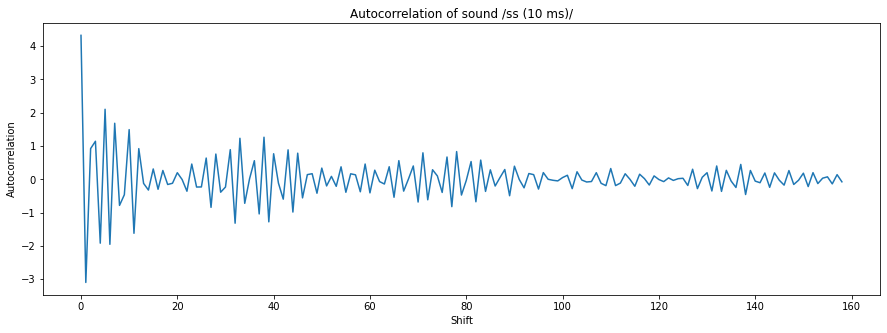

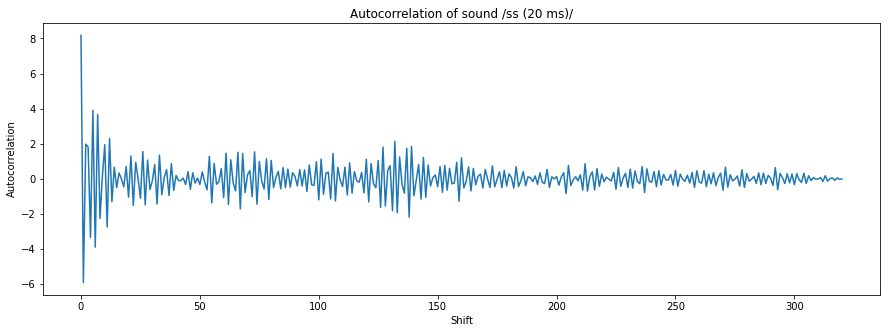

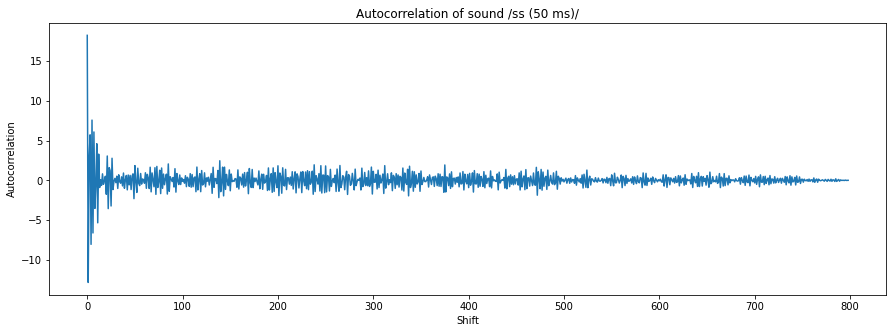

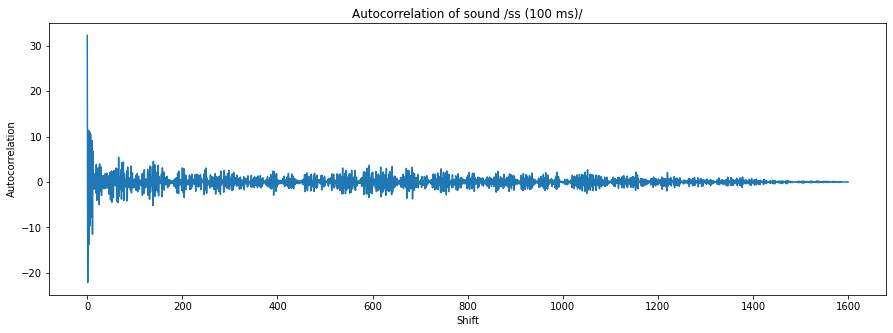

In [102]:
# For sound /ss/
ss = audio[int((1.033-0.005)*fs):int((1.033+0.005)*fs)]
autocorr(ss, plot=1, sound_name="ss (10 ms)")

ss = audio[int((1.033-0.010)*fs):int((1.033+0.010)*fs)]
autocorr(ss, plot=1, sound_name="ss (20 ms)")

ss = audio[int((1.033-0.025)*fs):int((1.033+0.025)*fs)]
autocorr(ss, plot=1, sound_name="ss (50 ms)")

ss = audio[int((1.033-0.050)*fs):int((1.033+0.050)*fs)]
autocorr(ss, plot=1, sound_name="ss (100 ms)")

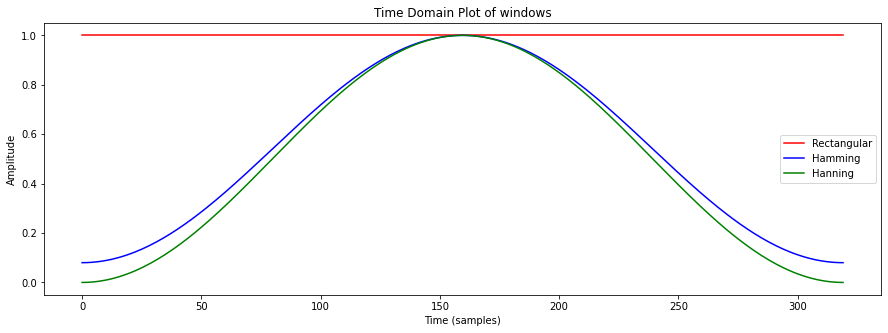

In [112]:
hamming = np.hamming(int(0.02*fs))
hanning = np.hanning(int(0.02*fs))
rect = np.ones(int(0.02*fs))

plt.figure(figsize=(15,5))
plt.plot(rect, c='r')
plt.plot(hamming, c='b')
plt.plot(hanning, c='g')
plt.title("Time Domain Plot of windows")
plt.legend(['Rectangular', 'Hamming', 'Hanning'])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [107]:
# we take the most preferred frame size:
# frame_size = 20 ms
ee = audio[int((0.437-0.010)*fs):int((0.437+0.010)*fs)]
ss = audio[int((1.033-0.010)*fs):int((1.033+0.010)*fs)]

# multiply the frames with hanning and hamming window of same length
ee_hamming = np.multiply(ee, np.hamming(len(ee)))
ee_hanning = np.multiply(ee, np.hanning(len(ee)))

ss_hamming = np.multiply(ss, np.hamming(len(ss)))
ss_hanning = np.multiply(ss, np.hanning(len(ss)))

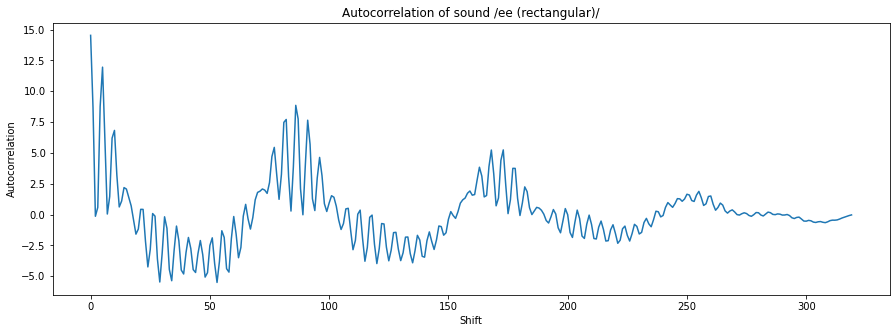

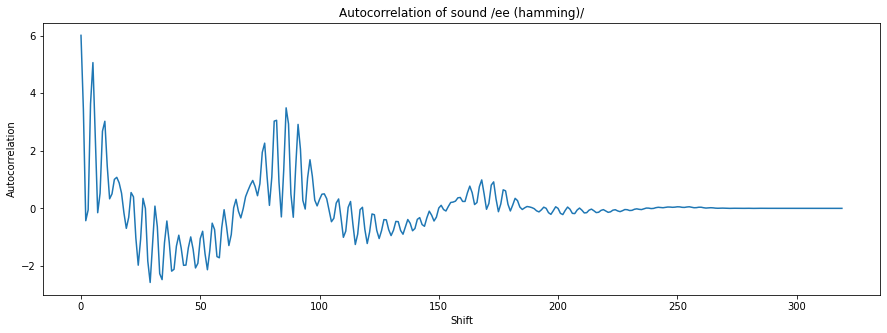

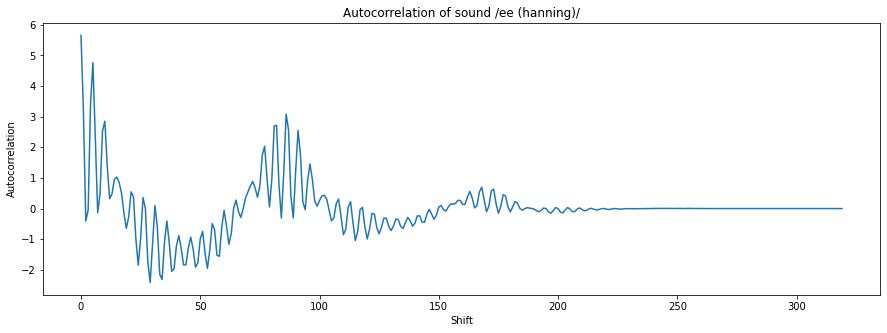

In [108]:
# for the sound /ee/
autocorr(ee, plot=1, sound_name="ee (rectangular)")
autocorr(ee_hamming, plot=1, sound_name="ee (hamming)")
autocorr(ee_hanning, plot=1, sound_name="ee (hanning)")

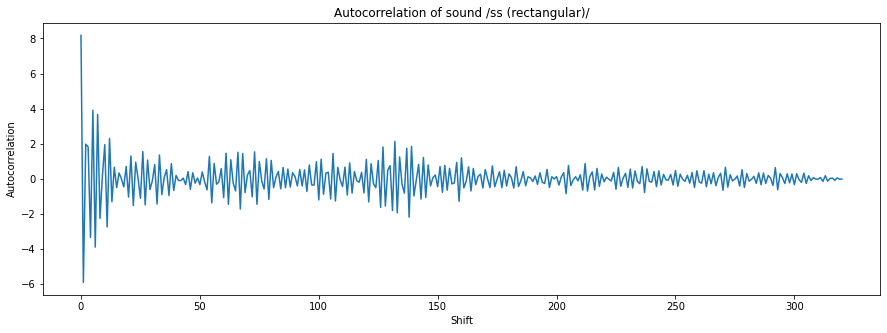

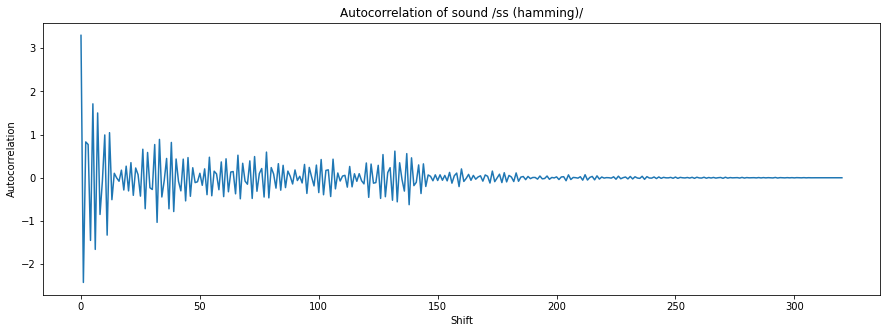

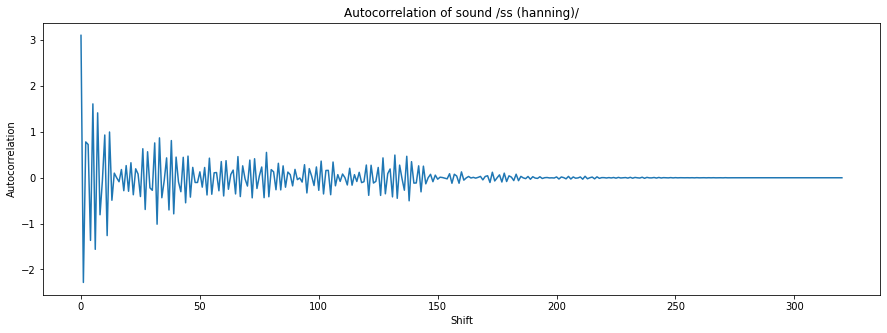

In [109]:
# for the sound /ss/
autocorr(ss, plot=1, sound_name="ss (rectangular)")
autocorr(ss_hamming, plot=1, sound_name="ss (hamming)")
autocorr(ss_hanning, plot=1, sound_name="ss (hanning)")

### **Observations**
1. When we take longer frame size for autocorrelation, we get more periods (if the signal is periodic). This may not be good for precise measurement of pitch period.
2. We should prefer the frame size of 20 ms as it is not too long and not too short. The quasi-stationarity assumption is followed and there is enough data to capture pitch period in general.
3. The Hamming and Hanning windows suppress the ends of the frame. As we are generally interested only in the first major peak in the autocorrelation plot, it is good to use a Hamming or a Hanning window.
4. Both Hamming and Hanning windows have a similar structure. Although since we are interested only in the first major peak occurrence, we choose Hanning window as it suppresses the ends more as compared to Hamming window.  